In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
# Important packages :
import pandas as pd
import numpy as np
import math

import copy
from scipy import stats
from scipy.stats import skew, norm, boxcox_normmax
from scipy.special import boxcox1p

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error as MSE
import statsmodels.api as sm

from itertools import combinations
import itertools

# **I. Exploratory Data Analysis :**

**1. Reading the data**

**2. Checking types of features**

**3. Percentage of missing values**

**4. BPL_B distribution analysis**

**5. Identify the highest correlation coefficients**



**1. Read the data :**

In [ ]:
rocks_train = pd.read_csv('/content/drive/MyDrive/train_1.csv',  decimal=',')
rocks_test  = pd.read_csv('/content/drive/MyDrive/test_1.csv',  decimal=',')

**2. Checking types of features :**

In [ ]:
rocks_train.dtypes

Unnamed: 0        int64
OBJECTID          int64
CMM              object
CM               object
TYPE_            object
NIVEAU           object
GISEMENT         object
TRANCHE          object
ZONE_            object
RAPPORT_MIN      object
MINR_PASSANT     object
X               float64
Y               float64
Z               float64
PT              float64
PP              float64
BPL_B           float64
RP              float64
CO2_B           float64
CAO_B           float64
SIO2_B          float64
FE2O3_B         float64
AL2O3_B         float64
F_B             float64
CORG_B          float64
NA2O_B          float64
K2O_B           float64
MGO_B           float64
CD_B            float64
U_B             float64
AS_B            float64
V_B             float64
ZN_B            float64
TI_B            float64
TR_B            float64
SR_B            float64
CL_B            float64
Mo_B            float64
Cr_B            float64
SIO2_L          float64
MGO_L           float64
CD_L            

**3. Percentage of missing values**

In [ ]:
# Missing values of rocks_train :
rocks_train.isna().sum() / len(rocks_train)

Unnamed: 0      0.000000
OBJECTID        0.000000
CMM             0.000000
CM              0.000000
TYPE_           0.000000
NIVEAU          0.000000
GISEMENT        0.000000
TRANCHE         0.387551
ZONE_           0.098731
RAPPORT_MIN     0.000000
MINR_PASSANT    0.000000
X               0.000000
Y               0.000000
Z               0.000000
PT              0.000000
PP              0.000000
BPL_B           0.000000
RP              0.000000
CO2_B           0.000000
CAO_B           0.000000
SIO2_B          0.000000
FE2O3_B         0.000000
AL2O3_B         0.000000
F_B             0.000000
CORG_B          0.000000
NA2O_B          0.000000
K2O_B           0.000000
MGO_B           0.000000
CD_B            0.000000
U_B             0.000000
AS_B            0.000000
V_B             0.000000
ZN_B            0.000000
TI_B            0.000000
TR_B            0.000000
SR_B            0.000000
CL_B            0.000000
Mo_B            0.000000
Cr_B            0.000000
SIO2_L          0.000000


In [ ]:
# Missing values of rocks_test :
rocks_test.isna().sum() / len(rocks_test)

Unnamed: 0      0.000000
OBJECTID        0.000000
CMM             0.000000
CM              0.000000
TYPE_           0.000000
NIVEAU          0.000000
GISEMENT        0.000000
TRANCHE         0.386374
ZONE_           0.099260
RAPPORT_MIN     0.000000
MINR_PASSANT    0.000000
X               0.000000
Y               0.000000
Z               0.000000
PT              0.000000
PP              0.000000
RP              0.000000
CO2_B           0.000000
CAO_B           0.000000
SIO2_B          0.000000
FE2O3_B         0.000000
AL2O3_B         0.000000
F_B             0.000000
CORG_B          0.000000
NA2O_B          0.000000
K2O_B           0.000000
MGO_B           0.000000
CD_B            0.000000
U_B             0.000000
AS_B            0.000000
V_B             0.000000
ZN_B            0.000000
TI_B            0.000000
TR_B            0.000000
SR_B            0.000000
CL_B            0.000000
Mo_B            0.000000
Cr_B            0.000000
SIO2_L          0.000000
MGO_L           0.000000


**Comment** : **9%** *of ZONE_ data is missing*. **38%** *of TRANCHE data is missing in both train and test. Later, we will fill missing values using KNN imputer for ordinal encoding or using Hot encoding.*

**4. BPL_B distribution analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


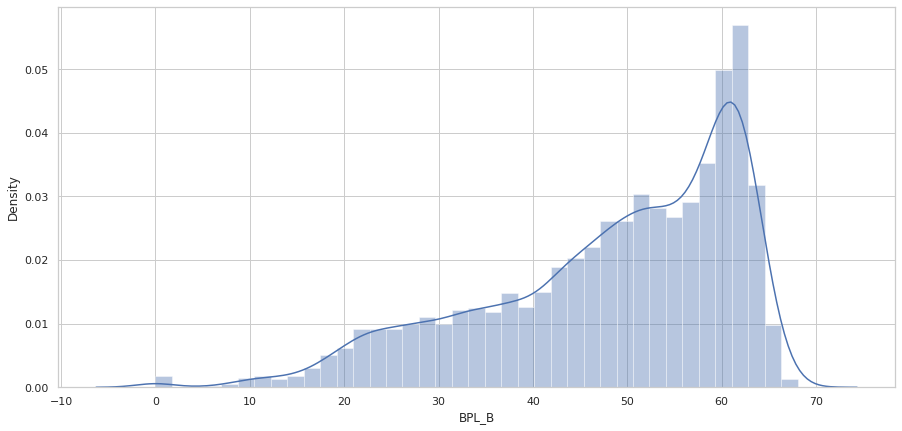

Skewness : -0.870995
Kurtosis : 0.019888


In [ ]:
plt.figure(figsize = (15, 7))
sns.distplot(rocks_train['BPL_B']);
plt.show()
print("Skewness : %f" % rocks_train['BPL_B'].skew())
print("Kurtosis : %f" % rocks_train['BPL_B'].kurt())

In [ ]:
# log(1+x) transform
rocks_trainskew = copy.deepcopy(rocks_train)
rocks_trainskew["BPL_B"] = np.log1p(rocks_trainskew["BPL_B"])
print("Skewness : %f" % rocks_trainskew["BPL_B"].skew())

Skewness : -3.646153


*The distribution seems asymmetric but the asymmetry coefficient is not very large (0.87) . Transformations such as log or sqrt do not reduce skewness. The values of kurtosis coefficient is < 3, it shows that BPL_B does not contain outliers*

**5. Identify the highest correlation coefficients**

In [ ]:
# Order the correlation coefficients of other variables with BPL_B
correlation_mat = rocks_train.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) >= 0.3]
print(strong_pairs.BPL_B)

CO2_B   -0.737601
ORDRE   -0.602302
MGO_L   -0.470741
X        0.408847
BPL_B    1.000000
dtype: float64


**We will plot BPL_B as a function of each of the variables having the highest Correlation coeff**

*   The objective is to see if we can identify some obvious outliers



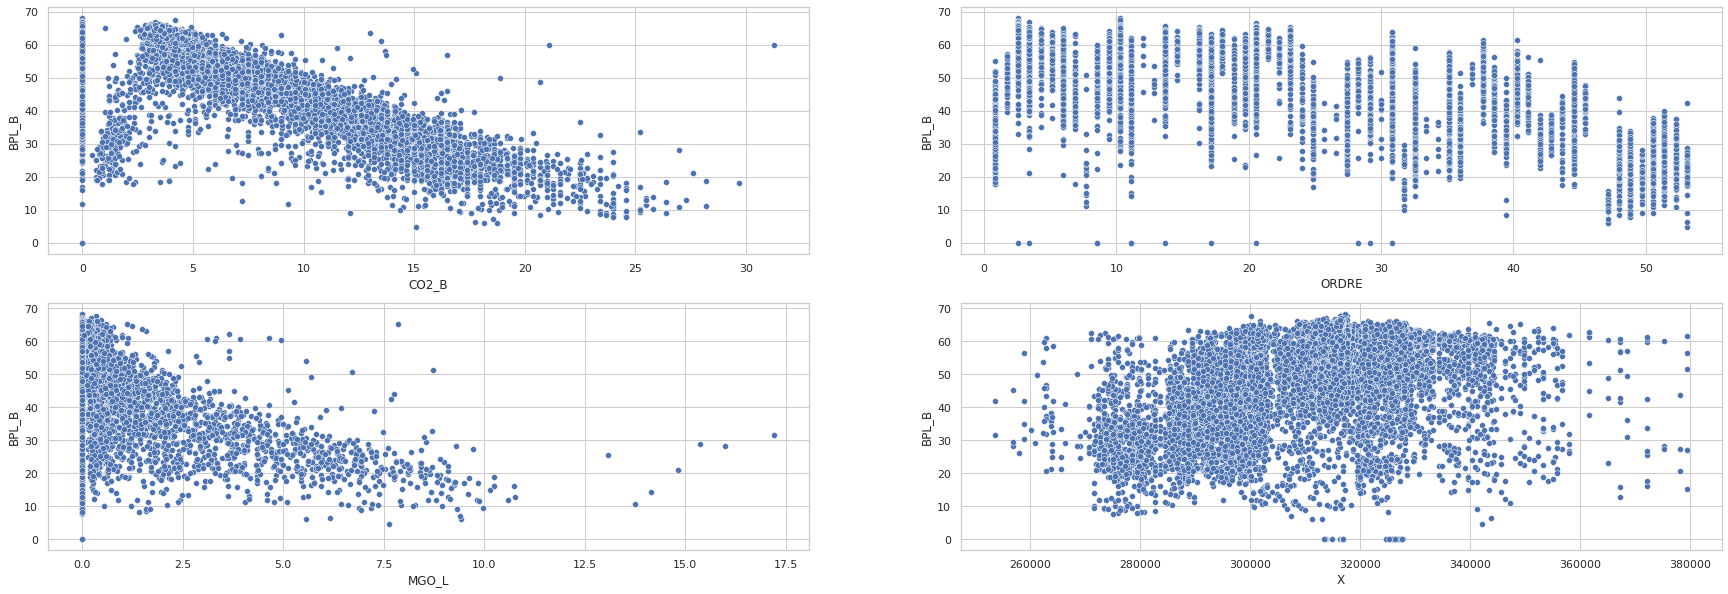

In [ ]:
# The objective is to see if we can identify some obvious outliers
fig, side = plt.subplots(2, 2, figsize = (30, 10))

sns.scatterplot(x = rocks_train['CO2_B'], y = rocks_train['BPL_B'], ax = side[0, 0])
sns.scatterplot(x = rocks_train['ORDRE'], y = rocks_train['BPL_B'], ax = side[0, 1])
sns.scatterplot(x = rocks_train['MGO_L'], y = rocks_train['BPL_B'], ax = side[1, 0])
sns.scatterplot(x = rocks_train['X'], y = rocks_train['BPL_B'], ax = side[1, 1])

fig.show()

**Comment** : *It is difficult to decide which of the ouliers we need to remove. Later in the model section, we will try to find the number of outliers to remove in order to minimize the RMSE of the testing set.*

# **II. Data processing :**

**1.   Concatenate rocks_train (without the label) and rocks_test (We chose to do this in order to apply the same transformations)**

**2.   Use Ordinal Encoding and then fill missing values with KNN imputer then Split the concatenated data frame**

**3.   Use Hot Encoding then Split the concatenated data frame**

**4.   Split the -train_1.csv- into train set and test set in both Ordinal Encoding and Hot Encoding**


*  **PS : We decided to introduce ordinal and hot encoding to make a use of one them when needed directly in the model section.**





**1. Concatenate rocks_train (without the label) and rocks_test :**

In [ ]:
ROCKS_LAB = pd.concat([rocks_train.drop('BPL_B', axis = 1), rocks_test], axis = 0)    # Used in Label Encoding
ROCKS_HOT = pd.concat([rocks_train.drop('BPL_B', axis = 1), rocks_test], axis = 0)    # Used in Hot Encoding

**2. Use Ordinal Encoding and then fill missing values with KNN imputer then Split the concatenated data frame :**

In [ ]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

# We chose to encode categorical features manually except for ('RAPPORT_MIN', 'MINR_PASSANT', 'OBS') :
ROCKS_LAB['TYPE_'] = ROCKS_LAB['TYPE_'].replace(['GEOCHIMIE'], 1)
ROCKS_LAB['TYPE_'] = ROCKS_LAB['TYPE_'].replace(['MINERALURGIE'], 2)

#Extract the float part in the following Categorical Features :
ROCKS_LAB['CMM'] = ROCKS_LAB['CMM'].str.extract('(\d+)', expand = False).astype(float)
ROCKS_LAB['CM'] = ROCKS_LAB['CM'].str.extract('(\d+)', expand = False).astype(float)
ROCKS_LAB['GISEMENT'] = ROCKS_LAB['GISEMENT'].str.extract('(\d+)', expand = False).astype(float)
ROCKS_LAB['NIVEAU'] = ROCKS_LAB['NIVEAU'].str.extract('(\d+)', expand = False).astype(float)
ROCKS_LAB['ZONE_'] = ROCKS_LAB['ZONE_'].str.extract('(\d+)', expand = False).astype(float)
ROCKS_LAB['TRANCHE'] = ROCKS_LAB['TRANCHE'].str.extract('(\d+)', expand = False).astype(float)

ROCKS_LAB['RAPPORT_MIN'] = pd.to_numeric(lab_enc.fit_transform(ROCKS_LAB['RAPPORT_MIN']), downcast = 'float')
ROCKS_LAB['MINR_PASSANT'] = pd.to_numeric(lab_enc.fit_transform(ROCKS_LAB['MINR_PASSANT']), downcast = 'float')
ROCKS_LAB['OBS'] = pd.to_numeric(lab_enc.fit_transform(ROCKS_LAB['OBS']), downcast = 'float')

# Filling missing values with KNN imputer :
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)

ROCKS_LAB = pd.DataFrame(np.round(imputer.fit_transform(ROCKS_LAB)), columns = ROCKS_LAB.columns)


# Splitting the concatenated data frame 'ROCKS_LAB' :
TRAIN_LAB = ROCKS_LAB.iloc[:len(rocks_train), :]
TEST_LAB = ROCKS_LAB.iloc[len(rocks_train):, :]

**3. Use Hot Encoding then Split the concatenated data frame :**

In [ ]:
# Hot Encoding :
ROCKS_HOT = pd.get_dummies(ROCKS_HOT)

# Splitting the concatenated data frame 'ROCKS_HOT' :
TRAIN_HOT = ROCKS_HOT.iloc[:len(rocks_train), :]
TEST_HOT = ROCKS_HOT.iloc[len(rocks_train):, :]

**4. Split the -train_1.csv- into train set and test set in both Ordinal Encoding and Hot Encoding**

In [ ]:
# Splitting 'TRAIN_LAB' into train set and test set  :
X_train_LAB, X_test_LAB, Y_train_LAB, Y_test_LAB = train_test_split(TRAIN_LAB, rocks_train.BPL_B, test_size = 0.3, random_state = 42)

# Splitting 'TRAIN_HOT' into train set and test set  :
X_train_HOT, X_test_HOT, Y_train_HOT, Y_test_HOT = train_test_split(TRAIN_HOT, rocks_train.BPL_B, test_size = 0.3, random_state = 42)

# **III. Establishing Models :**

> **Regressors used : LinearRegression – RandomForestRegressor – LGBMRegressor – CatboostRegressor**


**1. Comparing the performance of label encoding vs Hot encoding for different models**

**2. Performing Backward Elimination on LinearRegression when using Label Encoding**

**3. Identify least important features for each model. Then we drop these features for each model and finally see the result :**

**4. See the impact of removing outliers on each regressor** 

In [ ]:
# This function enables us to add a row to a dataframe in a specific index.     We will use it through out our study
def Insert_row(row_number, df, row_value): 
  df1 = df.iloc[:row_number] 
  df2 = df.iloc[row_number:] 
  df1.loc[row_number] = row_value 
  df_result = pd.concat([df1, df2]) 
  df_result.index = [*range(df_result.shape[0])] 
  return df_result 

In [ ]:
# Importing all models :
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

import lightgbm as lgb
from lightgbm import LGBMRegressor

!pip install catboost
import catboost as CAT
from catboost import CatBoostRegressor
####

linregressor = LinearRegression()
rfr = RandomForestRegressor()
lightgbm = LGBMRegressor()
Cat = CatBoostRegressor()

**1. Comparing the performance of label encoding vs Hot encoding for different models**

In [ ]:
all_models = [('LinearRegression()', linregressor), ('RandomForestRegressor()', rfr), ('LGBMRegressor()', lightgbm), ('CatBoostRegressor()', Cat)]

R = []

for (name, model) in all_models :
  # Using Label Encoding :
  model.fit(X = X_train_LAB, y = Y_train_LAB)

  LAB_model_predicted_train = model.predict(X_train_LAB)
  LAB_model_predicted_test = model.predict(X_test_LAB)

  LAB_model_RMSE_train = np.sqrt(MSE(y_true = Y_train_LAB, y_pred = LAB_model_predicted_train))
  LAB_model_RMSE_test = np.sqrt(MSE(y_true = Y_test_LAB, y_pred = LAB_model_predicted_test))

  # Using Hot Encoding :
  model.fit(X = X_train_HOT, y = Y_train_HOT)

  HOT_model_predicted_train = model.predict(X_train_HOT)
  HOT_model_predicted_test = model.predict(X_test_HOT)

  HOT_model_RMSE_train = np.sqrt(MSE(y_true = Y_train_HOT, y_pred = HOT_model_predicted_train))
  HOT_model_RMSE_test = np.sqrt(MSE(y_true = Y_test_HOT, y_pred = HOT_model_predicted_test))


  R.append((name, round(LAB_model_RMSE_train, 3), round(LAB_model_RMSE_test, 3), round(HOT_model_RMSE_train, 3), round(HOT_model_RMSE_test, 3)))

MODELS = pd.DataFrame(data = R, columns = ['Models', 'Train_RMSE_LAB', 'Test_RMSE_LAB', 'Train_RMSE_HOT', 'Test_RMSE_HOT'])

In [ ]:
MODELS

,Models,Train_RMSE_LAB,Test_RMSE_LAB,Train_RMSE_HOT,Test_RMSE_HOT
0,LinearRegression(),5.812,5.843,3.294,6.636
1,RandomForestRegressor(),1.200,3.367,1.164,3.264
2,LGBMRegressor(),2.499,3.188,2.395,3.198
3,CatBoostRegressor(),2.261,3.172,2.396,3.200


**2. Performing Backward Elimination on LinearRegression Using Label Encoding :**

In [ ]:
# Show the summary of Linear Regression when using Label Encoding :
LinReg_1 = sm.OLS(Y_train_LAB, sm.add_constant(X_train_LAB)).fit()
Predictions_1 = LinReg_1.predict(sm.add_constant(X_train_LAB))
print(LinReg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  BPL_B   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     694.7
Date:                Sun, 27 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:18:40   Log-Likelihood:                -23844.
No. Observations:                7501   AIC:                         4.778e+04
Df Residuals:                    7453   BIC:                         4.812e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -58.3238      4.654    -12.531   

In [ ]:
# Optimazing Model using Backward Elimination :
Features_RMSE_list = []

# Determine the minimum number of features to keep at the end of the process of Backward Elimination :
min_kept = 3

for k in range(min_kept, len(TRAIN_LAB.columns)) :
  df = TRAIN_LAB
  initial = LinReg_1

  for itteration in range(len(LinReg_1.pvalues) - k) :
    m = list(initial.pvalues).index(max(initial.pvalues))

    df1 = df.drop(columns = df.columns[m])

    X_tr, X_te, Y_tr, Y_te = train_test_split(df1, rocks_train.BPL_B, test_size = 0.3, random_state = 42)

    model = sm.OLS(Y_tr, sm.add_constant(X_tr)).fit()
    Pre = model.predict(sm.add_constant(X_tr))

    df = df1
    initial = model

  X_train_tunned, X_test_tunned, Y_train_tunned, Y_test_tunned = train_test_split(df, rocks_train.BPL_B, test_size = 0.3, random_state = 42)

  # Fitting linregressor after removing the feature corresponding to the maximum p-value :
  linregressor.fit(X = X_train_tunned, y = Y_train_tunned)

  LinReg_predicted_train = linregressor.predict(X_train_tunned)
  LinReg_predicted_test = linregressor.predict(X_test_tunned)

  LinReg_RMSE_train = np.sqrt(MSE(y_true = Y_train_tunned, y_pred = LinReg_predicted_train))
  LinReg_RMSE_test = np.sqrt(MSE(y_true = Y_test_tunned, y_pred = LinReg_predicted_test)) 

  Features_RMSE_list.append((round(LinReg_RMSE_train, 3), round(LinReg_RMSE_test, 3), list(df.columns)))

Backward_Elimination_LAB = pd.DataFrame(data = Features_RMSE_list, columns = ['Train_RMSE_LAB', 'Test_RMSE_LAB', 'Features to KEEP'])

In [ ]:
Backward_Elimination_LAB.head()

,Train_RMSE_LAB,Test_RMSE_LAB,Features to KEEP
0,12.990,12.794,"[F_B, OBS]"
1,12.872,12.671,"[FE2O3_B, F_B, OBS]"
2,12.799,12.603,"[SIO2_B, FE2O3_B, F_B, OBS]"
3,12.798,12.603,"[Unnamed: 0, SIO2_B, FE2O3_B, F_B, OBS]"
4,12.735,12.536,"[Unnamed: 0, CAO_B, SIO2_B, FE2O3_B, F_B, OBS]"


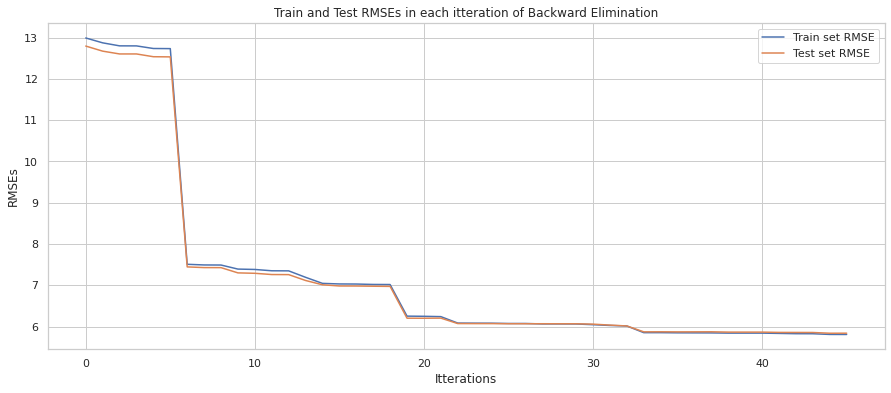

In [ ]:
plt.figure(figsize = (15, 6))

plt.plot(Backward_Elimination_LAB.Train_RMSE_LAB, label = 'Train set RMSE')
plt.plot(Backward_Elimination_LAB.Test_RMSE_LAB, label = 'Test set RMSE')

plt.title('Train and Test RMSEs in each itteration of Backward Elimination')
plt.xlabel('Itterations')
plt.ylabel('RMSEs')

plt.legend(loc = 'best')

plt.show()

In [ ]:
# Recap 1 :
min_rmse_train = float(Backward_Elimination_LAB[Backward_Elimination_LAB.Test_RMSE_LAB == min(Backward_Elimination_LAB.Test_RMSE_LAB)].Train_RMSE_LAB)
min_rmse_test = float(Backward_Elimination_LAB[Backward_Elimination_LAB.Test_RMSE_LAB == min(Backward_Elimination_LAB.Test_RMSE_LAB)].Test_RMSE_LAB)

L = ('LinearRegression() AFTER Backward Elimination', min_rmse_train, min_rmse_test, '', '')

MODELS = Insert_row(1, MODELS, L)

In [ ]:
MODELS

,Models,Train_RMSE_LAB,Test_RMSE_LAB,Train_RMSE_HOT,Test_RMSE_HOT
0,LinearRegression(),5.812,5.843,3.294,6.636
1,LinearRegression() AFTER Backward Elimination,5.813,5.842,,
2,RandomForestRegressor(),1.200,3.367,1.164,3.264
3,LGBMRegressor(),2.499,3.188,2.395,3.198
4,CatBoostRegressor(),2.261,3.172,2.396,3.2


**3. Identify least important features for each model. Then we drop these features for each model and finally see the result :**

In [ ]:
# Let's set the number of the least important features to determine :
least = 10

models = [('RandomForestRegressor()', rfr), ('LGBMRegressor()', lightgbm), ('CatBoostRegressor()', Cat)]

A = []
for (name, model) in models :
  # Using Hot Encoding :
  model.fit(X = X_train_HOT, y = Y_train_HOT)

  feat_imp = pd.Series(model.feature_importances_, index = X_train_HOT.columns)
  list_feat = list(feat_imp.nsmallest(least).index)
  
  # Let's drop these features for each model
  model.fit(X = X_train_HOT.drop(list_feat, axis = 1), y = Y_train_HOT)

  HOT_model_predicted_train = model.predict(X_train_HOT.drop(list_feat, axis = 1))
  HOT_model_predicted_test = model.predict(X_test_HOT.drop(list_feat, axis = 1))

  HOT_model_RMSE_train = np.sqrt(MSE(y_true = Y_train_HOT, y_pred = HOT_model_predicted_train))
  HOT_model_RMSE_test = np.sqrt(MSE(y_true = Y_test_HOT, y_pred = HOT_model_predicted_test))

  A.append((name + ' - least important features', list_feat, round(HOT_model_RMSE_train, 3), round(HOT_model_RMSE_test, 3)))

LEAST_FEAT = pd.DataFrame(data = A, columns = ['Models', '10_least_important', 'Train_RMSE_HOT', 'Test_RMSE_HOT'])

In [ ]:
LEAST_FEAT

,Models,10_least_important,Train_RMSE_HOT,Test_RMSE_HOT
0,RandomForestRegressor() - least important feat...,"[CMM_CMM101, CMM_CMM102, CMM_CMM103, CMM_CMM10...",1.174,3.248
1,LGBMRegressor() - least important features,"[OBJECTID, NA2O_B, V_B, TI_B, TR_B, Mo_B, Cr_B...",2.395,3.198
2,CatBoostRegressor() - least important features,"[TI_B, Mo_B, AS_L, SIO2R_B, Th_B, CMM_CMM1, CM...",2.408,3.218


In [ ]:
# Recap 2 :
L_0 = [LEAST_FEAT.Models[0], '', '', LEAST_FEAT.Train_RMSE_HOT[0], LEAST_FEAT.Test_RMSE_HOT[0]]
L_1 = [LEAST_FEAT.Models[1], '', '', LEAST_FEAT.Train_RMSE_HOT[1], LEAST_FEAT.Test_RMSE_HOT[1]]
L_2 = [LEAST_FEAT.Models[2], '', '', LEAST_FEAT.Train_RMSE_HOT[2], LEAST_FEAT.Test_RMSE_HOT[2]]

MODELS = Insert_row(3, MODELS, L_0)
MODELS = Insert_row(5, MODELS, L_1)
MODELS = Insert_row(7, MODELS, L_2)

In [ ]:
MODELS

,Models,Train_RMSE_LAB,Test_RMSE_LAB,Train_RMSE_HOT,Test_RMSE_HOT
0,LinearRegression(),5.812,5.843,3.294,6.636
1,LinearRegression() AFTER Backward Elimination,5.813,5.842,,
2,RandomForestRegressor(),1.2,3.367,1.164,3.264
3,RandomForestRegressor() - least important feat...,,,1.174,3.248
4,LGBMRegressor(),2.499,3.188,2.395,3.198
5,LGBMRegressor() - least important features,,,2.395,3.198
6,CatBoostRegressor(),2.261,3.172,2.396,3.2
7,CatBoostRegressor() - least important features,,,2.408,3.218


**Conclusion : We tried removing the least important features of each model but the RMSE didn't improve significantly**

**4. Removing outliers**

*   **Objective : see the impact of removing some outliers (z-score criteria) on RMSEs of each model**

**Procedure :**

> **i.   Determine the maximum value of z-score in rocks_train minus categorical features**

> **ii.   Determine the position and the number of outliers (z-score > 3) in rocks_train minus categorical features**

> **iii.   Determine the optimal number of outliers to remove in order to minmize RMSE of each model**

In [ ]:
# i. Determine the maximum value of z-score in rocks_train minus categorical features :
L = ['Unnamed: 0', 'OBJECTID', 'CMM', 'CM', 'TYPE_', 'NIVEAU', 'GISEMENT', 'TRANCHE', 'ZONE_', 'RAPPORT_MIN', 'MINR_PASSANT', 'OBS']

rocks_numeric_train = rocks_train.drop(L, axis = 1)

numz = rocks_numeric_train.dtypes.index
z = np.abs(stats.zscore(rocks_numeric_train[numz]))

C = []
for line in z :
  C.append(max(line))

print('The maximum value of z-score in rocks_numeric_train is : ', round(max(C), 3))

The maximum value of z-score in rocks_numeric_train is :  36.637


In [ ]:
# ii. Determine the position and the number of outliers (z-score > 3) in rocks_train minus categorical features :
threshold = 3

D = []
for i in np.where(z > threshold):
  D.append(list(i))
Pos_num = pd.DataFrame({'row_index' : D[0], 'column_index' : D[1]})
Pos_num

,row_index,column_index
0,0,12
1,0,20
2,0,21
3,0,24
4,1,8
...,...,...
8619,10711,24
8620,10715,8
8621,10715,12
8622,10715,20


In [ ]:
# iii. Determine the optimal number of outliers to remove in order to minmize RMSE of each model :
all_models = [('LinearRegression()', linregressor), ('RandomForestRegressor()', rfr), ('LGBMRegressor()', lightgbm), ('CatBoostRegressor()', Cat)]

E_LAB = []
E_HOT = []

for (name, model) in all_models :
  list_ks_LAB = []
  list_ks_HOT = []
  # Range of z-score
  for k in range(1, 11) :
    l = []
    for i in np.where(z > k) :
      l.append(list(i))
    L = pd.DataFrame({'row_index' : l[0], 'column_index' : l[1]})
  
    # k (z-score threshold)
    rocks_train_without_outliers = rocks_train[(z < k).all(axis = 1)]

    # Concatenate rocks_train_without_outliers AND rocks_test :
    ROCKS_REFINED_LAB = pd.concat([rocks_train_without_outliers.drop('BPL_B', axis = 1), rocks_test], axis = 0)
    ROCKS_REFINED_HOT = pd.concat([rocks_train_without_outliers.drop('BPL_B', axis = 1), rocks_test], axis = 0)

  # Label Encoding :
    # We chose to encode categorical features manually except for ('RAPPORT_MIN', 'MINR_PASSANT', 'OBS') :
    ROCKS_REFINED_LAB['TYPE_'] = ROCKS_REFINED_LAB['TYPE_'].replace(['GEOCHIMIE'], 1)
    ROCKS_REFINED_LAB['TYPE_'] = ROCKS_REFINED_LAB['TYPE_'].replace(['MINERALURGIE'], 2)

    # Extract the float part in the following Categorical Features :
    ROCKS_REFINED_LAB['CMM'] = ROCKS_REFINED_LAB['CMM'].str.extract('(\d+)', expand = False).astype(float)
    ROCKS_REFINED_LAB['CM'] = ROCKS_REFINED_LAB['CM'].str.extract('(\d+)', expand = False).astype(float)
    ROCKS_REFINED_LAB['GISEMENT'] = ROCKS_REFINED_LAB['GISEMENT'].str.extract('(\d+)', expand = False).astype(float)
    ROCKS_REFINED_LAB['NIVEAU'] = ROCKS_REFINED_LAB['NIVEAU'].str.extract('(\d+)', expand = False).astype(float)
    ROCKS_REFINED_LAB['ZONE_'] = ROCKS_REFINED_LAB['ZONE_'].str.extract('(\d+)', expand = False).astype(float)
    ROCKS_REFINED_LAB['TRANCHE'] = ROCKS_REFINED_LAB['TRANCHE'].str.extract('(\d+)', expand = False).astype(float)

    ROCKS_REFINED_LAB['RAPPORT_MIN'] = pd.to_numeric(lab_enc.fit_transform(ROCKS_REFINED_LAB['RAPPORT_MIN']), downcast = 'float')
    ROCKS_REFINED_LAB['MINR_PASSANT'] = pd.to_numeric(lab_enc.fit_transform(ROCKS_REFINED_LAB['MINR_PASSANT']), downcast = 'float')
    ROCKS_REFINED_LAB['OBS'] = pd.to_numeric(lab_enc.fit_transform(ROCKS_REFINED_LAB['OBS']), downcast = 'float')

    # Filling missing values with KNN imputer :
    ROCKS_REFINED_LAB = pd.DataFrame(np.round(imputer.fit_transform(ROCKS_REFINED_LAB)), columns = ROCKS_REFINED_LAB.columns)

    # Splitting the concatenated data frame 'ROCKS_REFINED_LAB' :
    TRAIN_REFINED_LAB = ROCKS_REFINED_LAB.iloc[:len(rocks_train_without_outliers), :]
    TEST_REFINED_LAB = ROCKS_REFINED_LAB.iloc[len(rocks_train_without_outliers):, :]
  
  # Hot Encoding :
    ROCKS_REFINED_HOT = pd.get_dummies(ROCKS_REFINED_HOT)

    # Splitting the concatenated data frame 'ROCKS_REFINED_HOT' :
    TRAIN_REFINED_HOT = ROCKS_REFINED_HOT.iloc[:len(rocks_train_without_outliers), :]
    TEST_REFINED_HOT = ROCKS_REFINED_HOT.iloc[len(rocks_train_without_outliers):, :]


    # Splitting TRAIN_REFINED_LAB into train set and test set :
    X_train_REFINED_LAB, X_test_REFINED_LAB, Y_train_REFINED_LAB, Y_test_REFINED_LAB = train_test_split(TRAIN_REFINED_LAB, rocks_train_without_outliers.BPL_B, test_size = 0.3, random_state = 42)

    # Splitting TRAIN_REFINED_HOT into train set and test set :
    X_train_REFINED_HOT, X_test_REFINED_HOT, Y_train_REFINED_HOT, Y_test_REFINED_HOT = train_test_split(TRAIN_REFINED_HOT, rocks_train_without_outliers.BPL_B, test_size = 0.3, random_state = 42)  
  

    # Using Label Encoding :
    model.fit(X = X_train_REFINED_LAB, y = Y_train_REFINED_LAB)

    LAB_model_predicted_train = model.predict(X_train_REFINED_LAB)
    LAB_model_predicted_test = model.predict(X_test_REFINED_LAB)

    LAB_model_RMSE_train = np.sqrt(MSE(y_true = Y_train_REFINED_LAB, y_pred = LAB_model_predicted_train))
    LAB_model_RMSE_test = np.sqrt(MSE(y_true = Y_test_REFINED_LAB, y_pred = LAB_model_predicted_test))

    list_ks_LAB.append((LAB_model_RMSE_test, LAB_model_RMSE_train, k))
    list_ks_LAB.sort()

    # Using Hot Encoding :
    model.fit(X = X_train_REFINED_HOT, y = Y_train_REFINED_HOT)

    HOT_model_predicted_train = model.predict(X_train_REFINED_HOT)
    HOT_model_predicted_test = model.predict(X_test_REFINED_HOT)

    HOT_model_RMSE_train = np.sqrt(MSE(y_true = Y_train_REFINED_HOT, y_pred = HOT_model_predicted_train))
    HOT_model_RMSE_test = np.sqrt(MSE(y_true = Y_test_REFINED_HOT, y_pred = HOT_model_predicted_test))


    list_ks_HOT.append((HOT_model_RMSE_test, HOT_model_RMSE_train, k))
    list_ks_HOT.sort()

  E_LAB.append((name + ' - ouliers', list_ks_LAB[0][2], round(list_ks_LAB[0][1], 3), round(list_ks_LAB[0][0], 3)))
  E_HOT.append((name + ' - ouliers', list_ks_HOT[0][2], round(list_ks_HOT[0][1], 3), round(list_ks_HOT[0][0], 3)))

WITHOUT_OUTLIERS_LAB = pd.DataFrame(data = E_LAB, columns = ['Models', 'Threshold', 'Train_RMSE_LAB', 'Test_RMSE_LAB'])
WITHOUT_OUTLIERS_HOT = pd.DataFrame(data = E_HOT, columns = ['Models', 'Threshold', 'Train_RMSE_HOT', 'Test_RMSE_HOT'])

In [ ]:
WITHOUT_OUTLIERS_LAB

,Models,Threshold,Train_RMSE_LAB,Test_RMSE_LAB
0,LinearRegression() - ouliers,1,3.181,4.046
1,RandomForestRegressor() - ouliers,6,1.242,3.104
2,LGBMRegressor() - ouliers,2,2.109,2.942
3,CatBoostRegressor() - ouliers,6,2.268,2.895


In [ ]:
WITHOUT_OUTLIERS_HOT

,Models,Threshold,Train_RMSE_HOT,Test_RMSE_HOT
0,LinearRegression() - ouliers,7,3.203,4.284
1,RandomForestRegressor() - ouliers,6,1.240,2.965
2,LGBMRegressor() - ouliers,6,2.430,2.952
3,CatBoostRegressor() - ouliers,6,2.498,2.989


In [ ]:
# Recap 3 :
L_0 = [WITHOUT_OUTLIERS_LAB.Models[0], WITHOUT_OUTLIERS_LAB.Train_RMSE_LAB[0], WITHOUT_OUTLIERS_LAB.Test_RMSE_LAB[0], WITHOUT_OUTLIERS_HOT.Train_RMSE_HOT[0], WITHOUT_OUTLIERS_HOT.Test_RMSE_HOT[0]]
L_1 = [WITHOUT_OUTLIERS_LAB.Models[1], WITHOUT_OUTLIERS_LAB.Train_RMSE_LAB[1], WITHOUT_OUTLIERS_LAB.Test_RMSE_LAB[1], WITHOUT_OUTLIERS_HOT.Train_RMSE_HOT[1], WITHOUT_OUTLIERS_HOT.Test_RMSE_HOT[1]]
L_2 = [WITHOUT_OUTLIERS_LAB.Models[2], WITHOUT_OUTLIERS_LAB.Train_RMSE_LAB[2], WITHOUT_OUTLIERS_LAB.Test_RMSE_LAB[2], WITHOUT_OUTLIERS_HOT.Train_RMSE_HOT[2], WITHOUT_OUTLIERS_HOT.Test_RMSE_HOT[2]]
L_3 = [WITHOUT_OUTLIERS_LAB.Models[3], WITHOUT_OUTLIERS_LAB.Train_RMSE_LAB[3], WITHOUT_OUTLIERS_LAB.Test_RMSE_LAB[3], WITHOUT_OUTLIERS_HOT.Train_RMSE_HOT[3], WITHOUT_OUTLIERS_HOT.Test_RMSE_HOT[3]]

MODELS = Insert_row(2, MODELS, L_0)
MODELS = Insert_row(5, MODELS, L_1)
MODELS = Insert_row(8, MODELS, L_2)
MODELS = Insert_row(11, MODELS, L_3)

In [ ]:
MODELS

,Models,Train_RMSE_LAB,Test_RMSE_LAB,Train_RMSE_HOT,Test_RMSE_HOT
0,LinearRegression(),5.812,5.843,3.294,6.636
1,LinearRegression() AFTER Backward Elimination,5.813,5.842,,
2,LinearRegression() - ouliers,3.181,4.046,3.203,4.284
3,RandomForestRegressor(),1.2,3.367,1.164,3.264
4,RandomForestRegressor() - least important feat...,,,1.174,3.248
5,RandomForestRegressor() - ouliers,1.242,3.104,1.24,2.965
6,LGBMRegressor(),2.499,3.188,2.395,3.198
7,LGBMRegressor() - least important features,,,2.395,3.198
8,LGBMRegressor() - ouliers,2.109,2.942,2.43,2.952
9,CatBoostRegressor(),2.261,3.172,2.396,3.2


# **IV. Hyperparameters tuning using Bayesian Optimization :**

**1. Bayesian Optimization applied to LGBMRegressor (14 Parameters are selected) : (resuling in Lgbm_TUNNED)**

**2. Bayesian Optimization applied to CatBoostRegressor (2 Parameters are selected) : (resuling in Cat_TUNNED_1)**

**3. Bayesian Optimization applied to CatBoostRegressor (4 Parameters are selected) : (resuling in Cat_TUNNED_2)**

**4. Comparing results**

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

**1. Bayesian Optimization applied to LGBMRegressor (14 Parameters are selected) :**

In [ ]:
def LGBM_Bayes_Tuning(X, Y, init_round, opt_round, n_folds, random_seed, n_estimators) :
    # Prepare the features dataset :
    train_data = lgb.Dataset(data = X, label = Y, free_raw_data = False)
    
    # Parameters selected for tuning (14 Parameters are selected) :
    def eval(num_leaves, feature_fraction, max_depth, min_split_gain, min_child_weight, min_child_samples, reg_alpha, reg_lambda, learning_rate, subsample, colsample_bytree, min_data_in_leaf, lambda_l1, lambda_l2):
        params = {
            "objective" : 'regression',
            "bagging_fraction" : 0.8,
            "bagging_freq": 1,
            "verbosity": -1,
            "metric" : 'rmse'
        }
        params['num_leaves'] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        params['min_child_samples'] = min_child_samples
        params['reg_alpha'] = reg_alpha
        params['reg_lambda'] = reg_lambda
        params['learning_rate'] = learning_rate
        params['subsample'] = subsample
        params['colsample_bytree'] = colsample_bytree
        params['min_data_in_leaf'] = int(round(min_data_in_leaf)) 
        params['lambda_l1'] = lambda_l1
        params['lambda_l2'] = lambda_l2
 
        cv_result = lgb.cv(params, train_data, nfold = n_folds, seed = random_seed, verbose_eval = 200,stratified=False)

        return (-1.0 * np.array(cv_result['rmse-mean'])).max()

    # Tuning the 14 parameters selected using BayesianOptimization :
    Opt = BayesianOptimization(f = eval, pbounds = {'feature_fraction': (0.1, 1.0),   # Set ranges upon which the tuning will take place
                                                    'max_depth': (1, 50),
                                                    'num_leaves' : (50,500),
                                                    'min_split_gain': (0.001, 0.5),
                                                    'min_child_weight': (3, 100),
                                                    'min_child_samples' : (1, 50),
                                                    'reg_alpha' : (1, 10),
                                                    'reg_lambda' : (1, 10),
                                                    'learning_rate' : (0.001, 0.5),
                                                    'subsample' : (0.1, 1.0),
                                                    'colsample_bytree' : (0.1, 1.0),
                                                    'min_data_in_leaf' : (1, 100),
                                                    'lambda_l1': (0.1, 10),
                                                    'lambda_l2': (0.1, 10)
                                                    }, random_state = 42)
    Opt.maximize(init_points = init_round, n_iter = opt_round, acq = 'ei')

        # Return best parameters :
    BEST = pd.DataFrame(Opt.res)
    best_params = list(BEST[BEST.target == max(BEST.target)].params)[0]    
    return best_params

In [ ]:
# Hyperparameters tuning using Bayesian Optimization : 
LGBM_best_params = LGBM_Bayes_Tuning(X = TRAIN_HOT, Y = rocks_train.BPL_B, init_round = 20, opt_round = 20, n_folds = 10, random_seed = 42, n_estimators = 7000)

|   iter    |  target   | colsam... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | min_ch... | min_da... | min_sp... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  1        | -3.808    |  0.4371   |  0.9556   |  7.347    |  6.027    |  0.07885  |  8.644    |  3.846    |  87.02    |  60.51    |  0.3543   |  59.26    |  9.729    |  8.492    |  0.2911   |
|  2        | -3.605    |  0.2636   |  0.2651   |  3.112    |  5.295    |  0.2165   |  15.27    |  30.98    |  16.53    |  29.92    |  0.1838   |  255.2    |  8.067    |  2.797    |  0.5628   |
|  3        | -5.209    |  0.6332   |  0.1418   |  6.115    |  1.788    |  0.03346  |  47.5     |  48.32    |  81.41    |  31.16    |  0.04974  |  357.9    |  4.961    |  2.098    |  0.5457   |
|  4        | -3.617    |  0.1

In [ ]:
# Best Parameters of LGBMRegressor :
LGBM_best_params

{'colsample_bytree': 0.5681897466005437,
 'feature_fraction': 0.5972644900469503,
 'lambda_l1': 2.5620854864327134,
 'lambda_l2': 6.162571553241404,
 'learning_rate': 0.18619121417933118,
 'max_depth': 23.15711901895429,
 'min_child_samples': 38.99600683025238,
 'min_child_weight': 35.24757499217321,
 'min_data_in_leaf': 38.88661455897689,
 'min_split_gain': 0.36184764142910136,
 'num_leaves': 129.9599794522592,
 'reg_alpha': 5.837900646295606,
 'reg_lambda': 5.471391113677963,
 'subsample': 0.2876037042576277}

**2. Bayesian Optimization applied to CatBoostRegressor (2 Parameters are selected) :**

In [ ]:
def CAT_1_Bayes_Tuning(X, Y, init_round, opt_round, n_folds, random_seed, n_estimators):
    # Prepare the features dataset :
    train_data = CAT.Pool(data = X, label = Y)

    # Parameters selected for tuning (2 Parameters are selected) :
    def eval(depth, bagging_temperature):
        params = {
            "iterations": 100,
            "learning_rate": 0.05,
            "eval_metric": "R2",
            "verbose": False,
            "loss_function" : 'RMSE',
        }
        params[ "depth"] = int(round(depth)) 
        params["bagging_temperature"] = bagging_temperature
 
        cv_result = CAT.cv(train_data, params, nfold = n_folds, seed = random_seed, verbose_eval = 200, stratified = False)

        return np.max(cv_result['test-R2-mean'])

    # Tuning the 2 parameters selected using BayesianOptimization :
    Opt = BayesianOptimization(f = eval, pbounds = {'depth': (1, 12),           # Set ranges upon which the tuning will take place
                                                    'bagging_temperature': (1, 30)
                                                    }, random_state = 42)
    Opt.maximize(init_points = init_round, n_iter = opt_round, acq = 'ei')

        # Return best parameters :
    BEST = pd.DataFrame(Opt.res)
    best_params = list(BEST[BEST.target == max(BEST.target)].params)[0]    
    return best_params

In [ ]:
CAT_1_best_params = CAT_1_Bayes_Tuning(TRAIN_HOT, rocks_train.BPL_B, init_round = 5, opt_round = 5, n_folds = 10, random_seed = 42, n_estimators = 7000)

|   iter    |  target   | baggin... |   depth   |
-------------------------------------------------
0:	learn: -11.6095871	test: -11.6480183	best: -11.6480183 (0)	total: 5.98s	remaining: 9m 52s
99:	learn: 0.9312505	test: 0.9219040	best: 0.9219040 (99)	total: 6m 46s	remaining: 0us
|  1        |  0.9219   |  11.86    |  11.46    |
0:	learn: -11.6002190	test: -11.6368000	best: -11.6368000 (0)	total: 2.46s	remaining: 4m 4s
99:	learn: 0.9189371	test: 0.9128163	best: 0.9128163 (99)	total: 1m 33s	remaining: 0us
|  2        |  0.9128   |  22.23    |  7.585    |
0:	learn: -11.5966189	test: -11.6328273	best: -11.6328273 (0)	total: 1.9s	remaining: 3m 8s
99:	learn: 0.8734331	test: 0.8710726	best: 0.8710726 (99)	total: 40s	remaining: 0us
|  3        |  0.8711   |  5.525    |  2.716    |
0:	learn: -11.6095871	test: -11.6480183	best: -11.6480183 (0)	total: 5.7s	remaining: 9m 23s
99:	learn: 0.9312505	test: 0.9219040	best: 0.9219040 (99)	total: 6m 46s	remaining: 0us
|  4        |  0.9219   |  2.684    |

In [ ]:
CAT_1_best_params

{'bagging_temperature': 11.861663446573512, 'depth': 11.457857370509078}

**3. Bayesian Optimization applied to CatBoostRegressor (4 Parameters are selected) :**

In [ ]:
def CAT_2_Bayes_Tuning(X, Y, init_round, opt_round, n_folds, random_seed, n_estimators):
    # Prepare the features dataset :
    train_data = CAT.Pool(data = X, label = Y)
    
    # Parameters selected for tuning (4 Parameters are selected) :
    def eval(depth, bagging_temperature, learning_rate, l2_leaf_reg):
        params = {
            "iterations": 100,
            "eval_metric": "R2",
            "verbose": False,
            "loss_function" : 'RMSE',
        }

        params[ "depth"] = int(round(depth)) 
        params["bagging_temperature"] = bagging_temperature
        params["learning_rate"] = learning_rate
        params["l2_leaf_reg"] = l2_leaf_reg
 
        cv_result = CAT.cv(train_data, params, nfold = n_folds, seed = random_seed, verbose_eval = 200,stratified = False)

        return np.max(cv_result['test-R2-mean'])

    # Tuning the 4 parameters selected using BayesianOptimization : 
    Opt = BayesianOptimization(f = eval, pbounds = {'depth': (1, 12),           # Set ranges upon which the tuning will take place
                                                    'bagging_temperature': (1, 50),
                                                    'learning_rate': (0.1, 0.8),
                                                    'l2_leaf_reg': (0.1, 20)
                                                    }, random_state = 42)
    Opt.maximize(init_points = init_round, n_iter = opt_round,acq = 'ei')

        # Return best parameters :
    BEST = pd.DataFrame(Opt.res)
    best_params = list(BEST[BEST.target == max(BEST.target)].params)[0]    
    return best_params

In [ ]:
CAT_2_best_params = CAT_2_Bayes_Tuning(TRAIN_HOT, rocks_train.BPL_B, init_round = 5, opt_round = 5, n_folds = 10, random_seed = 42, n_estimators = 7000)

|   iter    |  target   | baggin... |   depth   | l2_lea... | learni... |
-------------------------------------------------------------------------
0:	learn: -2.9397114	test: -2.9639405	best: -2.9639405 (0)	total: 5.64s	remaining: 9m 18s
99:	learn: 0.9581449	test: 0.9263684	best: 0.9263684 (99)	total: 6m 51s	remaining: 0us
|  1        |  0.9264   |  19.35    |  11.46    |  14.67    |  0.5191   |
0:	learn: -0.6214438	test: -0.6287265	best: -0.6287265 (0)	total: 1.97s	remaining: 3m 14s
99:	learn: 0.9501479	test: 0.9321947	best: 0.9321947 (99)	total: 43.1s	remaining: 0us
|  2        |  0.9322   |  8.645    |  2.716    |  1.256    |  0.7063   |
0:	learn: -0.0633133	test: -0.0764316	best: -0.0764316 (0)	total: 3.09s	remaining: 5m 6s
99:	learn: 0.9813858	test: 0.9220073	best: 0.9228533 (63)	total: 2m 24s	remaining: 0us
|  3        |  0.9229   |  30.45    |  8.789    |  0.5096   |  0.7789   |
0:	learn: -7.4726422	test: -7.4984605	best: -7.4984605 (0)	total: 1.99s	remaining: 3m 16s
99:	learn: 

In [ ]:
CAT_2_best_params

{'bagging_temperature': 15.907869905017348,
 'depth': 6.772320747954616,
 'l2_leaf_reg': 8.695705870978102,
 'learning_rate': 0.30386039813862936}

**After using Bayesian Optimization on LGBMRegressor one time and on CatBoostRegressor two times we got the three following models :**

In [ ]:
Lgbm_TUNNED = LGBMRegressor(
                  colsample_bytree = 0.5681897466005437,
                  feature_fraction = 0.5972644900469503,
                  lambda_l1 = 2.5620854864327134,
                  lambda_l2 = 6.162571553241404,
                  learning_rate = 0.18619121417933118,
                  max_depth = 23,
                  min_child_samples = 38.99600683025238,
                  min_child_weight = 35.24757499217321,
                  min_data_in_leaf = 39,
                  min_split_gain = 0.36184764142910136,
                  num_leaves = 130,
                  reg_alpha = 5.837900646295606,
                  reg_lambda = 5.471391113677963,
                  subsample = 0.2876037042576277,
                  objective = 'regression',
                  bagging_fraction = 0.8,
                  bagging_freq = 1,
                  metric = 'rmse',                  
                  verbosity = -1,
                  random_state = 42
)

Cat_TUNNED_1 = CatBoostRegressor(
                  bagging_temperature = 11.861663446573512,
                  depth = 11
)

Cat_TUNNED_2 = CatBoostRegressor(
                  bagging_temperature = 15.907869905017348,
                  depth = 7,
                  learning_rate = 0.30386039813862936,
                  l2_leaf_reg = 8.695705870978102
)

**4. Comparing results : Fitting the 3 latest models (Lgbm_TUNNED, Cat_TUNNED_1, Cat_TUNNED_2) to (X_train_HOT, Y_train_HOT) and test them on X_test_HOT**

**Then we will compare the results with those obtained using LGBMRegressor() and CatBoostRegressor()**

In [ ]:
tunned_models = [('LGBMRegressor(TUNNED)', Lgbm_TUNNED), ('CatBoostRegressor(TUNNED_1)', Cat_TUNNED_1), ('CatBoostRegressor(TUNNED_2)', Cat_TUNNED_2)]

TUNNED_RMSEs = []
for (name, model) in tunned_models :
  model.fit(X = X_train_HOT, y = Y_train_HOT)

  model_predicted_train = model.predict(X_train_HOT)
  model_predicted_test = model.predict(X_test_HOT)

  model_RMSE_train = np.sqrt(MSE(y_true = Y_train_HOT, y_pred = model_predicted_train))
  model_RMSE_test = np.sqrt(MSE(y_true = Y_test_HOT, y_pred = model_predicted_test))

  TUNNED_RMSEs.append((name, round(model_RMSE_train , 3), round(model_RMSE_test , 3)))

TUNNED = pd.DataFrame(data = TUNNED_RMSEs, columns = ['Models', 'Train_RMSE_HOT', 'Test_RMSE_HOT'])

In [ ]:
TUNNED

,Models,Train_RMSE_HOT,Test_RMSE_HOT
0,LGBMRegressor(TUNNED),2.161,3.286
1,CatBoostRegressor(TUNNED_1),1.763,3.079
2,CatBoostRegressor(TUNNED_2),1.703,3.189


In [ ]:
# Recap 4 :
L_0 = [TUNNED.Models[0], '', '', TUNNED.Train_RMSE_HOT[0], TUNNED.Test_RMSE_HOT[0]]
L_1 = [TUNNED.Models[1], '', '', TUNNED.Train_RMSE_HOT[1], TUNNED.Test_RMSE_HOT[1]]
L_2 = [TUNNED.Models[2], '', '', TUNNED.Train_RMSE_HOT[2], TUNNED.Test_RMSE_HOT[2]]

MODELS = Insert_row(9, MODELS, L_0)
L_data = pd.DataFrame(data = [L_1, L_2], columns = MODELS.columns)
MODELS = pd.concat([MODELS, L_data], axis = 0, ignore_index = True)

In [ ]:
MODELS

,Models,Train_RMSE_LAB,Test_RMSE_LAB,Train_RMSE_HOT,Test_RMSE_HOT
0,LinearRegression(),5.812,5.843,3.294,6.636
1,LinearRegression() AFTER Backward Elimination,5.813,5.842,,
2,LinearRegression() - ouliers,3.181,4.046,3.203,4.284
3,RandomForestRegressor(),1.2,3.367,1.164,3.264
4,RandomForestRegressor() - least important feat...,,,1.174,3.248
5,RandomForestRegressor() - ouliers,1.242,3.104,1.24,2.965
6,LGBMRegressor(),2.499,3.188,2.395,3.198
7,LGBMRegressor() - least important features,,,2.395,3.198
8,LGBMRegressor() - ouliers,2.109,2.942,2.43,2.952
9,LGBMRegressor(TUNNED),,,2.161,3.286


# **V. Building a loop which provides us with a Data frame containing (RMSE of the training set, RMSE of the testing set, combination of CATEGORICAL features to drop)**

**(ALL POSSIBLE CATEGORICAL FEATURES COMBINATIONS ARE USED 2^12)**

**1. Using Cat_TUNNED_1**

**2. Conclusion**

In [ ]:
# ALL Categorical Features :
L = ['Unnamed: 0', 'OBJECTID', 'CMM', 'CM', 'TYPE_', 'NIVEAU', 'GISEMENT', 'TRANCHE', 'ZONE_', 'RAPPORT_MIN', 'MINR_PASSANT', 'OBS']

# Feature_Range contains all possible combinations of features in L
Feature_Range = []

for k in range(1, len(L) + 1) :
  for i in list(combinations(L, k)) :
    Feature_Range.append(list(i))

**1. Using Cat_TUNNED_1 :**

**PS : The loop took way too long to finish completely so we decided to stop it after over 5 hours of running !!!**

In [ ]:
Cat_TUNNED_1_RMSEs = []

for feat in Feature_Range :
  Rock_Train_Data = rocks_train.drop(feat, axis = 1)
  Rock_Test_Data = rocks_test.drop(feat, axis = 1)

  ROCKS = pd.concat([Rock_Train_Data.drop('BPL_B', axis = 1), Rock_Test_Data], axis = 0)

  ROCKS = pd.get_dummies(ROCKS)

  TRAIN = ROCKS.iloc[:len(rocks_train), :]
  TEST = ROCKS.iloc[len(rocks_train):, :]

  ###
  X = TRAIN
  Y = rocks_train.BPL_B

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

  ###
  Cat_TUNNED_1.fit(X = X_train, y = Y_train)

  Cat_TUNNED_1_predicted_train = Cat_TUNNED_1.predict(X_train)
  Cat_TUNNED_1_predicted_test = Cat_TUNNED_1.predict(X_test)

  Cat_TUNNED_1_RMSE_train = np.sqrt(MSE(y_true = Y_train, y_pred = Cat_TUNNED_1_predicted_train))
  Cat_TUNNED_1_RMSE_test = np.sqrt(MSE(y_true = Y_test, y_pred = Cat_TUNNED_1_predicted_test))
  
  Cat_TUNNED_1_RMSEs.append((round(Cat_TUNNED_1_RMSE_train, 3), round(Cat_TUNNED_1_RMSE_test, 3), feat))

Cat_TUNNED_1_RMSEs_DATAFRAME = pd.DataFrame(data = Cat_TUNNED_1_RMSEs, columns = ['Train_RMSE', 'Test_RMSE', 'Features_to_DROP'])

In [ ]:
# Visualize the data frame :
Cat_TUNNED_1_RMSEs_DATAFRAME

,Train_RMSE,Test_RMSE,Features_to_DROP
0,1.732,3.077,[Unnamed: 0]
1,1.732,3.077,[OBJECTID]
2,1.736,3.065,[CMM]
3,1.751,3.082,[CM]
4,1.716,3.072,[TYPE_]
5,1.887,3.135,[NIVEAU]
6,1.739,3.100,[GISEMENT]
7,1.750,3.065,[TRANCHE]
8,1.767,3.079,[ZONE_]
9,1.768,3.096,[RAPPORT_MIN]


In [ ]:
# Visualize all rows containing the minimum value of 'Train_RMSE' :
Cat_TUNNED_1_RMSEs_DATAFRAME[Cat_TUNNED_1_RMSEs_DATAFRAME.Train_RMSE == min(Cat_TUNNED_1_RMSEs_DATAFRAME.Train_RMSE)]

,Train_RMSE,Test_RMSE,Features_to_DROP
33,1.2,3.02,"[CMM, CM]"


In [ ]:
# Visualize all rows containing the minimum value of 'Test_RMSE' :
Cat_TUNNED_1_RMSEs_DATAFRAME[Cat_TUNNED_1_RMSEs_DATAFRAME.Test_RMSE == min(Cat_TUNNED_1_RMSEs_DATAFRAME.Test_RMSE)]

,Train_RMSE,Test_RMSE,Features_to_DROP
33,1.2,3.02,"[CMM, CM]"


**2. Conclusion :**

In [ ]:
# Recap 5 :
min_rmse_train = float(Cat_TUNNED_1_RMSEs_DATAFRAME[Cat_TUNNED_1_RMSEs_DATAFRAME.Test_RMSE == min(Cat_TUNNED_1_RMSEs_DATAFRAME.Test_RMSE)].Train_RMSE)
min_rmse_test = float(Cat_TUNNED_1_RMSEs_DATAFRAME[Cat_TUNNED_1_RMSEs_DATAFRAME.Test_RMSE == min(Cat_TUNNED_1_RMSEs_DATAFRAME.Test_RMSE)].Test_RMSE)

L_0 = ['CatBoostRegressor(TUNNED_1) - [CMM, CM]', '', '', min_rmse_train, min_rmse_test]
L = pd.DataFrame(data = L_0).transpose()
L.columns = MODELS.columns

MODELS = pd.concat([MODELS, L], axis = 0, ignore_index = True)

In [ ]:
MODELS

,Models,Train_RMSE_LAB,Test_RMSE_LAB,Train_RMSE_HOT,Test_RMSE_HOT
0,LinearRegression(),5.812,5.843,3.294,6.636
1,LinearRegression() AFTER Backward Elimination,5.813,5.842,,
2,LinearRegression() - ouliers,3.181,4.046,3.203,4.284
3,RandomForestRegressor(),1.2,3.367,1.164,3.264
4,RandomForestRegressor() - least important feat...,,,1.174,3.248
5,RandomForestRegressor() - ouliers,1.242,3.104,1.24,2.965
6,LGBMRegressor(),2.499,3.188,2.395,3.198
7,LGBMRegressor() - least important features,,,2.395,3.198
8,LGBMRegressor() - ouliers,2.109,2.942,2.43,2.952
9,LGBMRegressor(TUNNED),,,2.161,3.286


# **VI. Exploring Blending**

**1. Blending LGBMRegressor(TUNNED) AND CatBoostRegressor(TUNNED_1)**

**2. Remove [Unnamed: 0, CMM, CM] and then Blending CatBoostRegressor(TUNNED_1) AND CatBoostRegressor(TUNNED_2)**

**3. Comparing Results**

In [ ]:
# We built a function that enables the blending of any number of models (10 models max) :
def Blend(models_list, X, Y) :
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

  Ind_RMSEs = []
  L_train = []
  L_test = []

  for (name, model) in models_list :
    model.fit(X = X_train, y = Y_train)

    model_predicted_train = model.predict(X_train)
    model_predicted_test = model.predict(X_test)

    model_RMSE_train = np.sqrt(MSE(y_true = Y_train, y_pred = model_predicted_train))
    model_RMSE_test = np.sqrt(MSE(y_true = Y_test, y_pred = model_predicted_test))

    Ind_RMSEs.append((name, model_RMSE_train, model_RMSE_test))
    L_train.append(list(model_predicted_train))
    L_test.append(list(model_predicted_test))

  A = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

  Comb_A = []

  for p in itertools.product(A, repeat = len(L_train)) :
    if sum(p) == 1.0 :
      Comb_A.append(list(p))

  Blend_RMSEs = []
  for comb in Comb_A :
    # Blend for Train Set
    Result_lin_comb_train = []
    for i in range(len(L_train)) :
      T = []
      for j in range(len(L_train[i])) :
        m = L_train[i][j] * comb[i]
        T.append(m)
      Result_lin_comb_train.append(T)

    Result_list_train = []

    for i in range(len(Result_lin_comb_train[0])) :
      n = 0
      for j in range(len(Result_lin_comb_train)) :
        n = n + Result_lin_comb_train[j][i]
      Result_list_train.append(n)

    # Blend for Test Set
    Result_lin_comb_test = []
    for i in range(len(L_test)) :
      T = []
      for j in range(len(L_test[i])) :
        m = L_test[i][j] * comb[i]
        T.append(m)
      Result_lin_comb_test.append(T)

    Result_list_test = []

    for i in range(len(Result_lin_comb_test[0])) :
      n = 0
      for j in range(len(Result_lin_comb_test)) :
        n = n + Result_lin_comb_test[j][i]
      Result_list_test.append(n)


    # RMSE Comparison
    comp_train = np.sqrt(MSE(y_true = Y_train, y_pred = Result_list_train))
    comp_test = np.sqrt(MSE(y_true = Y_test, y_pred = Result_list_test))

    Blend_RMSEs.append((comp_train, comp_test, comb))
  
  OPTIMIZED = pd.DataFrame(data = Blend_RMSEs, columns = ['RMSE_Train', 'RMSE_Test', 'Combination'])

  return OPTIMIZED

**1. Blending LGBMRegressor(TUNNED) AND CatBoostRegressor(TUNNED_1) :**

In [ ]:
# Models upon which we apply the function Blend :
blend_Lgbm_TUNNED__Cat_TUNNED_1 = [('LGBMRegressor(TUNNED)', Lgbm_TUNNED), ('CatBoostRegressor(TUNNED_1)', Cat_TUNNED_1)]

BLEND_Lgbm_TUNNED__Cat_TUNNED_1 = Blend(blend_Lgbm_TUNNED__Cat_TUNNED_1, TRAIN_HOT, rocks_train.BPL_B)

In [ ]:
BLEND_Lgbm_TUNNED__Cat_TUNNED_1

,RMSE_Train,RMSE_Test,Combination
0,1.730977,3.056759,"[0.1, 0.9]"
1,1.715657,3.044190,"[0.2, 0.8]"
2,1.717664,3.041387,"[0.3, 0.7]"
3,1.736939,3.048377,"[0.4, 0.6]"
4,1.772918,3.065093,"[0.5, 0.5]"
5,1.824613,3.091377,"[0.6, 0.4]"
6,1.890737,3.126989,"[0.7, 0.3]"
7,1.969835,3.171613,"[0.8, 0.2]"
8,2.060415,3.224877,"[0.9, 0.1]"


In [ ]:
# Visualize the row containing the minimum value of 'RMSE_Test' :
BLEND_Lgbm_TUNNED__Cat_TUNNED_1[BLEND_Lgbm_TUNNED__Cat_TUNNED_1.RMSE_Test == min(BLEND_Lgbm_TUNNED__Cat_TUNNED_1.RMSE_Test)]

,RMSE_Train,RMSE_Test,Combination
2,1.717664,3.041387,"[0.3, 0.7]"


**2. Remove [Unnamed: 0, CMM, CM] and then Blending CatBoostRegressor(TUNNED_1) AND CatBoostRegressor(TUNNED_2)**

In [ ]:
blend_Cat_TUNNED_1__Cat_TUNNED_2 = [('CatBoostRegressor(TUNNED_1)', Cat_TUNNED_1), ('CatBoostRegressor(TUNNED_2)', Cat_TUNNED_2)]

# Removing ['Unnamed: 0', 'CMM', 'CM'] :
ROCKS_BLEND = pd.concat([rocks_train.drop('BPL_B', axis = 1), rocks_test], axis = 0)
ROCKS_BLEND = ROCKS_BLEND.drop(['Unnamed: 0', 'CMM', 'CM'], axis = 1)
ROCKS_BLEND = pd.get_dummies(ROCKS_BLEND)

# Splitting the concatenated data frame 'ROCKS_BLEND' :
TRAIN_BLEND = ROCKS_BLEND.iloc[:len(rocks_train), :]
TEST_BLEND = ROCKS_BLEND.iloc[len(rocks_train):, :]

BLEND_Cat_TUNNED_1__Cat_TUNNED_2 = Blend(blend_Cat_TUNNED_1__Cat_TUNNED_2, TRAIN_BLEND, rocks_train.BPL_B)

In [ ]:
BLEND_Cat_TUNNED_1__Cat_TUNNED_2

,RMSE_Train,RMSE_Test,Combination
0,1.108509,3.066317,"[0.1, 0.9]"
1,1.109650,3.039902,"[0.2, 0.8]"
2,1.113370,3.017953,"[0.3, 0.7]"
3,1.119642,3.000566,"[0.4, 0.6]"
4,1.128426,2.987823,"[0.5, 0.5]"
5,1.139661,2.979781,"[0.6, 0.4]"
6,1.153278,2.976481,"[0.7, 0.3]"
7,1.169192,2.977937,"[0.8, 0.2]"
8,1.187312,2.984142,"[0.9, 0.1]"


In [ ]:
# Visualize the row containing the minimum value of 'RMSE_Test' :
BLEND_Cat_TUNNED_1__Cat_TUNNED_2[BLEND_Cat_TUNNED_1__Cat_TUNNED_2.RMSE_Test == min(BLEND_Cat_TUNNED_1__Cat_TUNNED_2.RMSE_Test)]

,RMSE_Train,RMSE_Test,Combination
6,1.153278,2.976481,"[0.7, 0.3]"


**3. Comparing Results :**

In [ ]:
# Recap 6 :
min_rmse_train_blend_1 = float(BLEND_Lgbm_TUNNED__Cat_TUNNED_1[BLEND_Lgbm_TUNNED__Cat_TUNNED_1.RMSE_Test == min(BLEND_Lgbm_TUNNED__Cat_TUNNED_1.RMSE_Test)].RMSE_Train)
min_rmse_test_blend_1 = float(BLEND_Lgbm_TUNNED__Cat_TUNNED_1[BLEND_Lgbm_TUNNED__Cat_TUNNED_1.RMSE_Test == min(BLEND_Lgbm_TUNNED__Cat_TUNNED_1.RMSE_Test)].RMSE_Test)

min_rmse_train_blend_2 = float(BLEND_Cat_TUNNED_1__Cat_TUNNED_2[BLEND_Cat_TUNNED_1__Cat_TUNNED_2.RMSE_Test == min(BLEND_Cat_TUNNED_1__Cat_TUNNED_2.RMSE_Test)].RMSE_Train)
min_rmse_test_blend_2 = float(BLEND_Cat_TUNNED_1__Cat_TUNNED_2[BLEND_Cat_TUNNED_1__Cat_TUNNED_2.RMSE_Test == min(BLEND_Cat_TUNNED_1__Cat_TUNNED_2.RMSE_Test)].RMSE_Test)


L_0 = ['Blending LGBMRegressor(TUNNED) AND CatBoostRegressor(TUNNED_1)', '', '', round(min_rmse_train_blend_1, 3), round(min_rmse_test_blend_1, 3)]
L_1 = ['Blending CatBoostRegressor(TUNNED_1) AND CatBoostRegressor(TUNNED_2)', '', '', round(min_rmse_train_blend_2, 3), round(min_rmse_test_blend_2, 3)]


L_data = pd.DataFrame(data = [L_0, L_1], columns = MODELS.columns)
MODELS = pd.concat([MODELS, L_data], axis = 0, ignore_index = True)

In [ ]:
MODELS

,Models,Train_RMSE_LAB,Test_RMSE_LAB,Train_RMSE_HOT,Test_RMSE_HOT
0,LinearRegression(),5.812,5.843,3.294,6.636
1,LinearRegression() AFTER Backward Elimination,5.813,5.842,,
2,LinearRegression() - ouliers,3.181,4.046,3.203,4.284
3,RandomForestRegressor(),1.2,3.367,1.164,3.264
4,RandomForestRegressor() - least important feat...,,,1.174,3.248
5,RandomForestRegressor() - ouliers,1.242,3.104,1.24,2.965
6,LGBMRegressor(),2.499,3.188,2.395,3.198
7,LGBMRegressor() - least important features,,,2.395,3.198
8,LGBMRegressor() - ouliers,2.109,2.942,2.43,2.952
9,LGBMRegressor(TUNNED),,,2.161,3.286


**Comment** : *The model 17 where we use linear blending for the catboost tunned 1 with the catboost tunned 2, using the optimal coefficients while dropping CMM_CM and Unnamed:0, is the one that gave us the best submission in the public board. This model was also robust in the private board.*

# **VII. Evaluating and Improving CatBoostRegressor(TUNNED_1) Using 10 Fold Cross Validation 'Leave One Out'**

**PS : We decided to apply cross validation manually in order to thoroughly understand the process**

In [ ]:
import random

def CrossVal(model, X, Y,  cv = 10, SEED = 42) :
  random.seed(SEED)

  I = list(range(len(X)))
  random.shuffle(I)

  o = len(X) // cv
  II = []
  for i in range(0, len(X), o) :
    II.append(I[i : i + o])

  FOLDS = []
  for k in range(cv - 1) :
    FOLDS.append(X.loc[II[k]])
  FOLDS.append(X.loc[II[cv - 1] + II[cv]])

  Splits = []
  for comb in combinations(FOLDS, 9) :
    Splits.append(list(comb))

  cv_Folds = []
  for fold in Splits :
    cv_Folds.append(pd.concat(fold, axis = 0))

  Test_FOLDS = list(reversed(FOLDS))

  CASES = []
  for i in range(cv) :
    xTrain = cv_Folds[i]
    yTrain = Y[list(cv_Folds[i].index)]

    xTest = Test_FOLDS[i]
    yTest = Y[list(Test_FOLDS[i].index)] 

    model.fit(xTrain, yTrain)

    model_predicted_train = model.predict(xTrain)
    model_predicted_test = model.predict(xTest)

    model_RMSE_train = np.sqrt(MSE(y_true = yTrain, y_pred = model_predicted_train))
    model_RMSE_test = np.sqrt(MSE(y_true = yTest, y_pred = model_predicted_test)) 

    CASES.append((round(model_RMSE_train, 3), round(model_RMSE_test, 3), list(cv_Folds[i].index)))

  model_RMSEs = pd.DataFrame(data = CASES, columns = ['Train_RMSE', 'Test_RMSE', 'Split_Indexes'])

  return model_RMSEs

In [ ]:
# Apply CrossVal to CatBoostRegressor(TUNNED_1) :
CROSS_VAL_Cat_TUNNED_1 = CrossVal(Cat_TUNNED_1, TRAIN_HOT, rocks_train.BPL_B,  cv = 10, SEED = 42)

In [ ]:
CROSS_VAL_Cat_TUNNED_1

,Train_RMSE,Test_RMSE,Split_Indexes
0,1.821,2.873,"[10434, 4318, 192, 4819, 2294, 9072, 9263, 701..."
1,1.825,3.151,"[10434, 4318, 192, 4819, 2294, 9072, 9263, 701..."
2,1.846,3.011,"[10434, 4318, 192, 4819, 2294, 9072, 9263, 701..."
3,1.816,2.920,"[10434, 4318, 192, 4819, 2294, 9072, 9263, 701..."
4,1.839,2.941,"[10434, 4318, 192, 4819, 2294, 9072, 9263, 701..."
5,1.839,2.918,"[10434, 4318, 192, 4819, 2294, 9072, 9263, 701..."
6,1.798,3.196,"[10434, 4318, 192, 4819, 2294, 9072, 9263, 701..."
7,1.848,3.105,"[10434, 4318, 192, 4819, 2294, 9072, 9263, 701..."
8,1.848,3.219,"[10434, 4318, 192, 4819, 2294, 9072, 9263, 701..."
9,1.883,2.690,"[4768, 10156, 1349, 4882, 3870, 526, 4665, 103..."


In [ ]:
# Visualize the row containing the minimum value of 'Test_RMSE' :
CROSS_VAL_Cat_TUNNED_1[CROSS_VAL_Cat_TUNNED_1.Test_RMSE == min(CROSS_VAL_Cat_TUNNED_1.Test_RMSE)]

,Train_RMSE,Test_RMSE,Split_Indexes
9,1.883,2.69,"[4768, 10156, 1349, 4882, 3870, 526, 4665, 103..."


In [ ]:
# Recap 7 :
min_rmse_train = float(CROSS_VAL_Cat_TUNNED_1[CROSS_VAL_Cat_TUNNED_1.Test_RMSE == min(CROSS_VAL_Cat_TUNNED_1.Test_RMSE)].Train_RMSE)
min_rmse_test = float(CROSS_VAL_Cat_TUNNED_1[CROSS_VAL_Cat_TUNNED_1.Test_RMSE == min(CROSS_VAL_Cat_TUNNED_1.Test_RMSE)].Test_RMSE)

L_0 = ['Cross Val - CatBoostRegressor(TUNNED_1)', '', '', min_rmse_train, min_rmse_test]
L = pd.DataFrame(data = L_0).transpose()
L.columns = MODELS.columns

MODELS = pd.concat([MODELS, L], axis = 0, ignore_index = True)

In [ ]:
MODELS

,Models,Train_RMSE_LAB,Test_RMSE_LAB,Train_RMSE_HOT,Test_RMSE_HOT
0,LinearRegression(),5.812,5.843,3.294,6.636
1,LinearRegression() AFTER Backward Elimination,5.813,5.842,,
2,LinearRegression() - ouliers,3.181,4.046,3.203,4.284
3,RandomForestRegressor(),1.2,3.367,1.164,3.264
4,RandomForestRegressor() - least important feat...,,,1.174,3.248
5,RandomForestRegressor() - ouliers,1.242,3.104,1.24,2.965
6,LGBMRegressor(),2.499,3.188,2.395,3.198
7,LGBMRegressor() - least important features,,,2.395,3.198
8,LGBMRegressor() - ouliers,2.109,2.942,2.43,2.952
9,LGBMRegressor(TUNNED),,,2.161,3.286


**Remark**: We didn't remove outliers for catboost since it is a method we discovered its result just later in the competition. From the fourth part (hyperparameters tuning) we showed the methods that were used for our submissions. 